In [4]:
import numpy as np
import mne
import yasa
import pandas as pd

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [5]:
import sys
sys.path.append('../src')
from metrics import get_metrics, plot_hypnogram

# Build Dataset

In [6]:
txt_paths = [f"../dataset/{i}/{i}_1.txt" for i in range(1, 11)]

labels1_list = []

for txt in txt_paths:
    labels1 = pd.read_csv(txt, header = None).squeeze("columns")
    labels1[labels1==5]=4
    labels1 = labels1[:-30]
    labels1_list.append(labels1)

labels1 = pd.concat(labels1_list, axis=0, ignore_index=True)

txt_paths = [f"../dataset/{i}/{i}_2.txt" for i in range(1, 11)]

labels2_list = []

for txt in txt_paths:
    labels2 = pd.read_csv(txt, header = None).squeeze("columns")
    labels2[labels2==5]=4
    labels2 = labels2[:-30]
    labels2_list.append(labels2)

labels2 = pd.concat(labels1_list, axis=0, ignore_index=True)


total_labels = len(labels1)
num_matches = sum(np.array(labels1) == np.array(labels2))
num_differences = total_labels - num_matches
agreement_percentage = (num_matches / total_labels) * 100

print(f"Total Labels: {total_labels}")
print(f"Number of Matches: {num_matches}")
print(f"Number of Differences: {num_differences}")
print(f"Agreement Percentage: {agreement_percentage:.2f}%")


Total Labels: 8589
Number of Matches: 8589
Number of Differences: 0
Agreement Percentage: 100.00%


In [7]:
edf_paths = [f"../dataset/{i}/{i}.edf" for i in range(1, 11)]

data_list = []
i=1

for path in edf_paths:
    raw = mne.io.read_raw_edf(path, preload=True)
    raw.drop_channels(['X4', 'X5', 'X6', 'DC3', 'X7', 'X8', 'SaO2', 'DC8', 'ROC-A1', 'F3-A2', 'C3-A2', 'O1-A2', 'F4-A1', 'O2-A1', 'X2', 'X3'])
    raw.resample(100)
    raw.filter(0.3, 49)
    sls = yasa.SleepStaging(raw, eeg_name ='C4-A1' ,  eog_name='LOC-A2', emg_name='X1')
    sls2 = sls.get_features()[:-30] 
    sls2['patient'] = i
    data_list.append(sls2)
    i+=1

Extracting EDF parameters from /home/julian/info/Uni/health/sleep-stage-detection/dataset/1/1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5723999  =      0.000 ... 28619.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 49.50 Hz)
- Filter length: 1101 samples (11.010 s)

Extracting EDF parameters from /home/julian/info/Uni/health/sleep-stage-detection/dataset/2/2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 

In [8]:
df = pd.concat(data_list, axis=0, ignore_index=True)
df['label'] = labels1


In [9]:
df

,eeg_abspow,eeg_abspow_c7min_norm,eeg_abspow_p2min_norm,eeg_alpha,eeg_alpha_c7min_norm,eeg_alpha_p2min_norm,eeg_at,eeg_at_c7min_norm,eeg_at_p2min_norm,eeg_beta,...,eog_std,eog_std_c7min_norm,eog_std_p2min_norm,eog_theta,eog_theta_c7min_norm,eog_theta_p2min_norm,time_hour,time_norm,patient,label
0,2.223068,0.204966,0.002076,0.306459,0.378508,0.849507,4.183846,0.938656,2.029363,0.126726,...,3.658173,1.719663,2.068285,0.027003,-0.753603,-0.772851,0.000000,0.000000,1,0
1,1.739309,0.187676,-0.035666,0.214499,0.363193,0.644535,1.858936,0.838479,1.347365,0.142990,...,2.873480,1.567306,1.747598,0.048089,-0.751319,-0.699733,0.008333,0.001049,1,0
2,10.646273,0.178649,0.415034,0.053756,0.354735,0.337353,1.102060,0.774777,0.972015,0.103112,...,3.556994,1.419040,1.826927,0.042671,-0.753057,-0.687887,0.016667,0.002099,1,0
3,3.218050,0.118178,0.350609,0.125759,0.373581,0.264007,1.339224,0.733314,0.819126,0.195343,...,2.967387,1.242866,1.746112,0.048401,-0.756539,-0.672028,0.025000,0.003148,1,0
4,1.839396,0.060042,0.335642,0.145482,0.400621,0.084603,1.453737,0.701424,0.418695,0.268479,...,2.672432,1.056105,1.544686,0.039588,-0.762816,-0.650208,0.033333,0.004197,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,1.689531,0.083630,0.166005,0.054617,0.042170,-0.040508,0.309166,-0.037917,-0.024846,0.012473,...,1.162780,-0.044361,-0.024150,0.124126,0.052475,0.035126,6.341667,0.957233,10,3
8585,0.827841,0.060448,0.132634,0.112396,0.080795,0.005466,0.447176,-0.022316,-0.102220,0.037533,...,0.938274,-0.043509,-0.029735,0.265009,0.063362,0.196317,6.350000,0.958491,10,3
8586,0.969841,0.041204,0.110130,0.066259,0.106981,-0.059442,0.373438,-0.005168,-0.185313,0.023099,...,0.980872,-0.038315,-0.041812,0.135848,0.042102,0.174866,6.358333,0.959748,10,3
8587,1.027211,0.025514,0.078914,0.126245,0.131536,0.155500,0.877514,0.014709,0.090224,0.084172,...,2.469572,0.011695,0.080303,0.053560,0.012319,0.027808,6.366667,0.961006,10,0


In [10]:
# Zähle die Anzahl der verschiedenen 'label'-Werte im DataFrame
label_counts = df['label'].value_counts()

print(label_counts)


label
2    2616
3    2016
0    1674
1    1217
4    1066
Name: count, dtype: int64


In [11]:
df_train = df[df['patient'].between(1, 8)]
df_test = df[df['patient'].between(9, 10)]

y_train = df_train['label']
X_train = df_train.drop(columns=['label'])

y_test = df_test['label']
X_test = df_test.drop(columns=['label'])

classes=[0, 1, 2, 3, 4]

# Sklearn HistGradientBoostingClassifier

In [12]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier().fit(X_train, y_train)

df_test['preds_sklearn'] = clf.predict(X_test)

/tmp/ipykernel_5489/381617101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['preds_sklearn'] = clf.predict(X_test)


Accuracy: 0.7760

Confusion Matrix:
[[200  41   8   0   0]
 [ 56 242  65   0  23]
 [ 13  76 416  24   6]
 [  0   0  33 304   0]
 [  0  14  22   1 161]]

Detailed Classification Metrics:
   Class  Precision    Recall  F1-Score  Support
0      0   0.743494  0.803213  0.772201      249
1      1   0.648794  0.626943  0.637681      386
2      2   0.764706  0.777570  0.771084      535
3      3   0.924012  0.902077  0.912913      337
4      4   0.847368  0.813131  0.829897      198


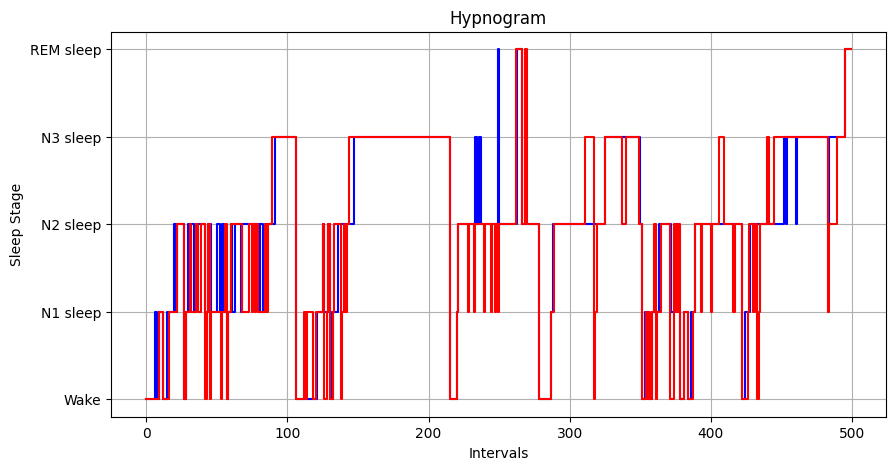

In [13]:
metrics_sklearn = get_metrics(df_test['label'], df_test['preds_sklearn'], classes)
plot_hypnogram(df_test['label'], df_test['preds_sklearn'])

# Yasa Predictor

In [14]:
edf_paths = [f"../dataset/{i}/{i}.edf" for i in range(9, 11)]

preds_sls = []

for path in edf_paths:
    raw = mne.io.read_raw_edf(path, preload=True)
    raw.drop_channels(['X4', 'X5', 'X6', 'DC3', 'X7', 'X8', 'SaO2', 'DC8', 'ROC-A1', 'F3-A2', 'C3-A2', 'O1-A2', 'F4-A1', 'O2-A1', 'X2', 'X3'])
    raw.resample(100)
    raw.filter(0.3, 49)
    sls = yasa.SleepStaging(raw, eeg_name ='C4-A1' ,  eog_name='LOC-A2', emg_name='X1')
    preds_sls.extend(yasa.hypno_str_to_int(sls.predict()[:-30]))

df_test['preds_sls'] = preds_sls

Extracting EDF parameters from /home/julian/info/Uni/health/sleep-stage-detection/dataset/9/9.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5813999  =      0.000 ... 29069.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 49.50 Hz)
- Filter length: 1101 samples (11.010 s)

Extracting EDF parameters from /home/julian/info/Uni/health/sleep-stage-detection/dataset/10/10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 

/home/julian/info/Uni/health/sleep-stage-detection/.venv/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 49.50 Hz)
- Filter length: 1101 samples (11.010 s)



/home/julian/info/Uni/health/sleep-stage-detection/.venv/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/tmp/ipykernel_5489/661778736.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['preds_sls'] = preds_sls


Accuracy: 0.4516

Confusion Matrix:
[[238   4   5   0   2]
 [248  88  34   0  16]
 [185  47 300   0   3]
 [ 92   2 230  13   0]
 [ 28  34   5   0 131]]

Detailed Classification Metrics:
   Class  Precision    Recall  F1-Score  Support
0      0   0.300885  0.955823  0.457692      249
1      1   0.502857  0.227979  0.313725      386
2      2   0.522648  0.560748  0.541028      535
3      3   1.000000  0.038576  0.074286      337
4      4   0.861842  0.661616  0.748571      198


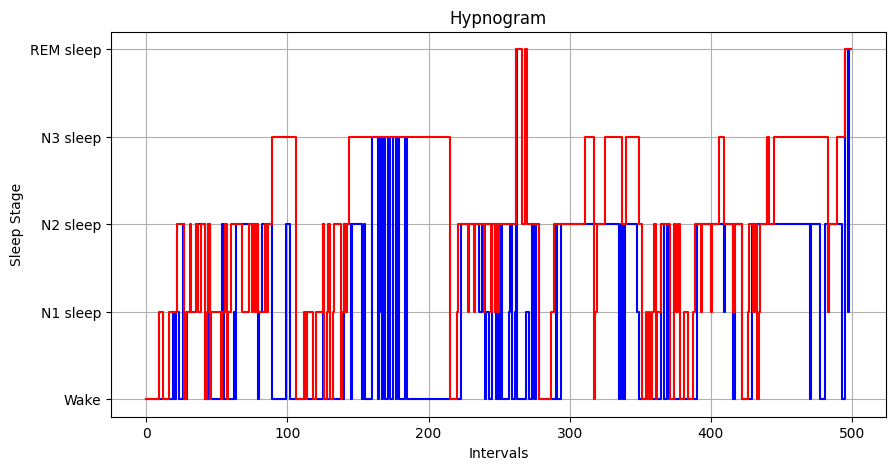

In [15]:
metrics_sls = get_metrics(df_test['label'], df_test['preds_sls'], classes)
plot_hypnogram(df_test['label'], df_test['preds_sls'])

# XGBoost XGB

In [16]:
import xgboost as xgb

clf = xgb.XGBClassifier(num_class=5, objective='multi:softmax', eval_metric='mlogloss').fit(X_train, y_train)

df_test['preds_xgb'] = clf.predict(X_test)

/tmp/ipykernel_5489/1677789893.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['preds_xgb'] = clf.predict(X_test)


Accuracy: 0.7812

Confusion Matrix:
[[200  42   6   0   1]
 [ 66 239  61   0  20]
 [ 17  65 424  22   7]
 [  0   0  36 300   1]
 [  0   5  23   1 169]]

Detailed Classification Metrics:
   Class  Precision    Recall  F1-Score  Support
0      0   0.706714  0.803213  0.751880      249
1      1   0.680912  0.619171  0.648575      386
2      2   0.770909  0.792523  0.781567      535
3      3   0.928793  0.890208  0.909091      337
4      4   0.853535  0.853535  0.853535      198


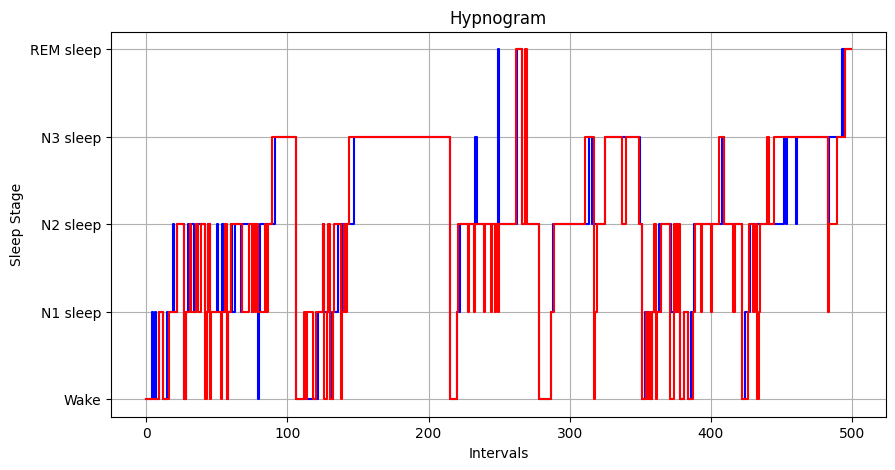

In [17]:
metrics_xgb = get_metrics(df_test['label'], df_test['preds_xgb'], classes)
plot_hypnogram(df_test['label'], df_test['preds_xgb'])